In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import ast

In [22]:
# df = pd.read_csv("../simulation_results.csv", sep=',', 
#                   names=["Patient ID", "CTAS Level", 
#                          "Arrival Time", "Departure Time", "LOS",
#                          "Triage Waiting Time", "ED Waiting Time",
#                          "Medication Waiting Time", "Inpatient Waiting Time", 
#                          "Triage Waiting Room Length", "ED Waiting Room Length",
#                          "Medication Waiting Room Length", "Inpatient Waiting Room Length"
#                         ])

In [23]:
df = pd.read_csv("../simulation_results.csv", sep=r",(?![^\[]*\])")

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_10323/3152665141.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../simulation_results.csv", sep=r",(?![^\[]*\])")


In [24]:
# df[1000:1010]
df[:10]

,Patient ID,CTAS Level,Tests,Arrival Time,Departure Time,LOS,Triage Waiting Time,ED Waiting Time,Medication Waiting Time,Inpatient Waiting Time,Triage Waiting Room Length,ED Waiting Room Length,Medication Waiting Room Length,Inpatient Waiting Room Length
0,1,1,['ED Blood Test'],0.000000,22.564901,22.564901,0.0,0.0,0.000000,0.0,1,1,9,1
1,2,5,"['Triage ECG', 'Triage Urine', 'Triage X-Ray']",0.365564,101.528271,101.162708,0.0,0.0,1.936929,0.0,1,1,9,1
2,3,0,[],1.462743,0.000000,-1.462743,0.0,0.0,0.000000,0.0,1,1,9,1
3,4,0,[],1.532924,0.000000,-1.532924,0.0,0.0,0.000000,0.0,1,1,9,1
4,5,1,['ED CT'],1.899614,71.369191,69.469577,0.0,0.0,0.000000,0.0,1,1,9,1
5,6,1,"['ED Blood Test', 'ED CT']",2.768536,81.023893,78.255357,0.0,0.0,0.000000,0.0,1,1,9,1
6,7,1,['Triage ECG'],2.991550,86.928364,83.936815,0.0,0.0,1.769070,0.0,1,1,9,1
7,8,1,[],3.118041,15.615620,12.497579,0.0,0.0,0.000000,0.0,1,1,9,1
8,9,3,"['Triage ECG', 'ED CT']",3.435579,136.864243,133.428664,0.0,0.0,1.516355,0.0,1,1,9,1
9,10,1,['ED Blood Test'],3.808014,23.383472,19.575458,0.0,0.0,0.000000,0.0,1,1,9,1


In [25]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['Patient ID', 'CTAS Level', 'Tests', 'Arrival Time', 'Departure Time',
       'LOS', 'Triage Waiting Time', 'ED Waiting Time',
       'Medication Waiting Time', 'Inpatient Waiting Time',
       'Triage Waiting Room Length', 'ED Waiting Room Length',
       'Medication Waiting Room Length', 'Inpatient Waiting Room Length'],
      dtype='object')

In [26]:
los_vals = []

for items in df["LOS"]:
    if items > 0:
        los_vals.append(items)
        
print(len(los_vals))

12039


In [27]:
# for items in df["Tests"]:
#     items = ast.literal_eval(items)
#     if len(items) > 1:
#         print(items)

In [28]:
# los_vals.sort()
# print(los_vals)

In [29]:
print(min(los_vals), max(los_vals))

6.993154809173348 302.9024613841666


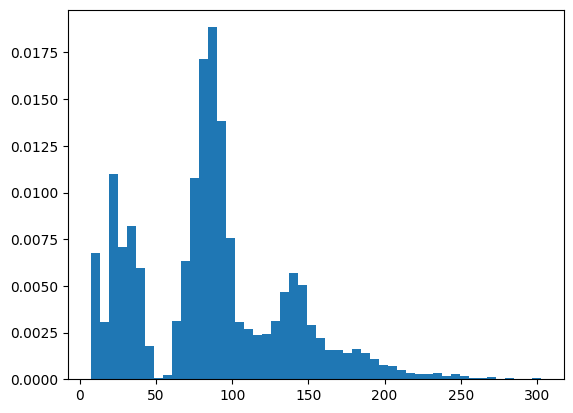

In [30]:
plt.hist(los_vals, density=True, bins="auto")
plt.show()

In [31]:
los_vals_ctas_i_iii = []
los_vals_ctas_iv_v = []

for ctas, los in zip(df["CTAS Level"], df["LOS"]):
    if los > 0:
        if int(ctas) in [1, 2, 3]:
            los_vals_ctas_i_iii.append(los)
        elif int(ctas) in [4, 5]:
            los_vals_ctas_iv_v.append(los)
        
print(len(los_vals_ctas_i_iii), len(los_vals_ctas_iv_v))

8058 3981


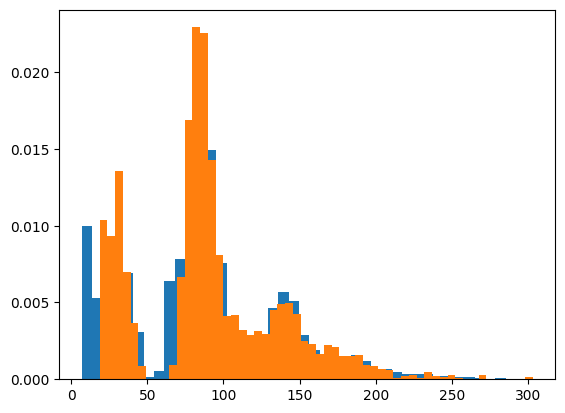

In [32]:
plt.hist(los_vals_ctas_i_iii, density=True, bins="auto")
plt.hist(los_vals_ctas_iv_v, density=True, bins="auto")
plt.show()

In [33]:
los_vals = [x/60 for x in los_vals]
ecdf = sm.distributions.ECDF(los_vals)

In [34]:
x = np.linspace(min(los_vals), max(los_vals), num=len(los_vals))
# Evaluate the CDF at each x-value
y = ecdf(x)

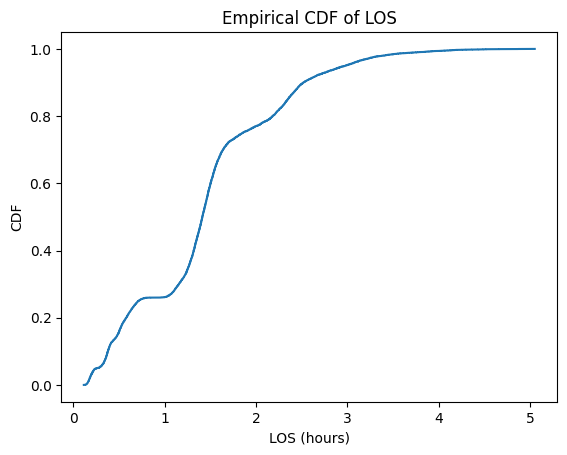

In [35]:
plt.step(x, y)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

In [36]:
los_vals_ctas_i = []
los_vals_ctas_ii = []
los_vals_ctas_iii = []
los_vals_ctas_iv = []
los_vals_ctas_v = []

for ctas, los in zip(df["CTAS Level"], df["LOS"]):
    if los > 0:
        if int(ctas) == 1:
            los_vals_ctas_i.append(los)
        elif int(ctas) == 2:
            los_vals_ctas_ii.append(los)
        elif int(ctas) == 3:
            los_vals_ctas_iii.append(los)
        elif int(ctas) == 4:
            los_vals_ctas_iv.append(los)
        elif int(ctas) == 5:
            los_vals_ctas_v.append(los)
        
print(len(los_vals_ctas_i), len(los_vals_ctas_ii), len(los_vals_ctas_iii), 
      len(los_vals_ctas_iv), len(los_vals_ctas_v))

4121 1946 1991 2073 1908


In [37]:
avg_los_ctas_i = sum(los_vals_ctas_i)/len(los_vals_ctas_i)
avg_los_ctas_ii = sum(los_vals_ctas_ii)/len(los_vals_ctas_ii)
avg_los_ctas_iii = sum(los_vals_ctas_iii)/len(los_vals_ctas_iii)
avg_los_ctas_iv = sum(los_vals_ctas_iv)/len(los_vals_ctas_iv)
avg_los_ctas_v = sum(los_vals_ctas_v)/len(los_vals_ctas_v)

print(avg_los_ctas_i/60, avg_los_ctas_ii/60, avg_los_ctas_iii/60, avg_los_ctas_iv/60, avg_los_ctas_v/60)

1.191850145852287 1.669168385185064 1.654709216089364 1.69168065555771 1.3175712827598418


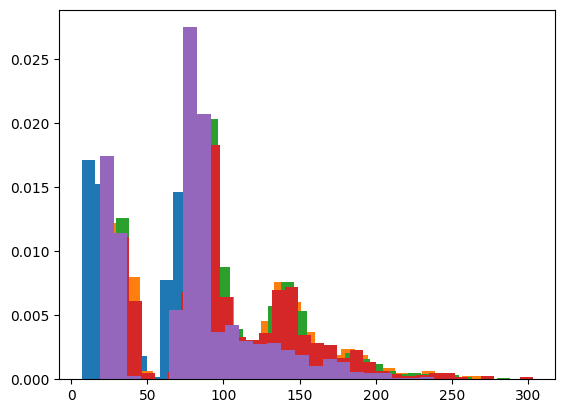

In [38]:
plt.hist(los_vals_ctas_i, density=True, bins="auto")
plt.hist(los_vals_ctas_ii, density=True, bins="auto")
plt.hist(los_vals_ctas_iii, density=True, bins="auto")
plt.hist(los_vals_ctas_iv, density=True, bins="auto")
plt.hist(los_vals_ctas_v, density=True, bins="auto")
plt.show()

In [39]:
los_vals_i = [x for x in los_vals_ctas_i]
los_vals_ii = [x for x in los_vals_ctas_ii]
los_vals_iii = [x for x in los_vals_ctas_iii]
los_vals_iv = [x for x in los_vals_ctas_iv]
los_vals_v = [x for x in los_vals_ctas_v]

ecdf_i = sm.distributions.ECDF(los_vals_i)
ecdf_ii = sm.distributions.ECDF(los_vals_ii)
ecdf_iii = sm.distributions.ECDF(los_vals_iii)
ecdf_iv = sm.distributions.ECDF(los_vals_iv)
ecdf_v = sm.distributions.ECDF(los_vals_v)

In [40]:
x_i = np.linspace(min(los_vals_i), max(los_vals_i), num=len(los_vals_i))
x_ii = np.linspace(min(los_vals_ii), max(los_vals_ii), num=len(los_vals_ii))
x_iii = np.linspace(min(los_vals_iii), max(los_vals_iii), num=len(los_vals_iii))
x_iv = np.linspace(min(los_vals_iv), max(los_vals_iv), num=len(los_vals_iv))
x_v = np.linspace(min(los_vals_iv), max(los_vals_v), num=len(los_vals_v))

# Evaluate the CDF at each x-value
y_i = ecdf(x_i)
y_ii = ecdf(x_ii)
y_iii = ecdf(x_iii)
y_iv = ecdf(x_iv)
y_v = ecdf(x_v)

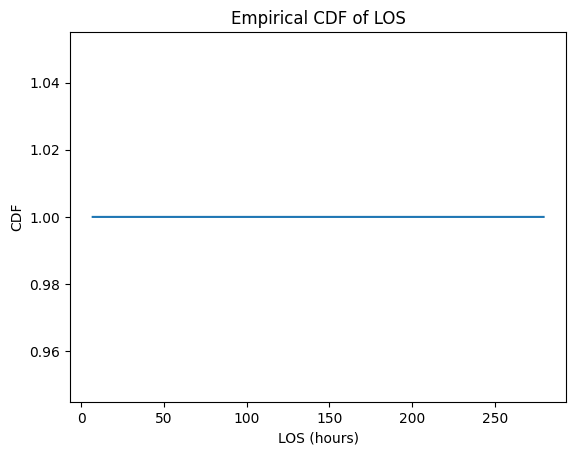

In [41]:
plt.step(x_i, y_i)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

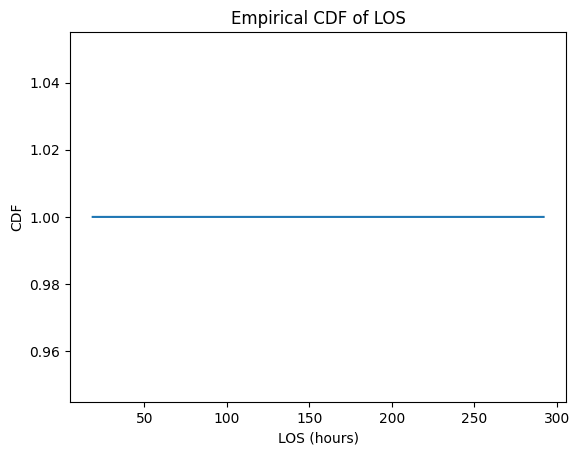

In [42]:
plt.step(x_ii, y_ii)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

In [ ]:
plt.step(x_iii, y_iii)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

In [ ]:
plt.step(x_iv, y_iv)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

In [ ]:
plt.step(x_v, y_v)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()